# Lets set the enviorment to start Hyperparameter tuning on our XGB & LGMB Model

As observed, XGB & LBGB models have performed well on test data we will choose these 2 models to hyper parameter tuning using gridsearchCV to get the best possible params.

Based on the best params lets build a final best model under XGB & LGBM, so that we can deploy one of them as for deployment. 

In [1]:
import os
import pandas as pd
import joblib
import lightgbm as lgbm
!pip install xgboost
import xgboost as xgb

print(os.getcwd())

Defaulting to user installation because normal site-packages is not writeable
C:\Users\hp\Documents\find-default\notebooks


In [2]:
os.chdir(r'\Users\hp\Documents\find-default')

In [3]:
# Loading the dataset
X_train = joblib.load('data/processed-data/X_train_v1.joblib')
y_train = joblib.load('data/processed-data/y_train_v1.joblib')
X_test = joblib.load('data/processed-data/X_test_v1.joblib')
y_test = joblib.load('data/processed-data/y_test_v1.joblib')
X_train_resampled = joblib.load('data/processed-data/X_train_resampled_v1.joblib')
y_train_resampled = joblib.load('data/processed-data/y_train_resampled_v1.joblib')
X_train_smote = joblib.load('data/processed-data/X_train_smote_v1.joblib')
y_train_smote = joblib.load('data/processed-data/y_train_smote_v1.joblib')

# Loading selected models for hyper parameter tuning.
xgb_base = joblib.load('models/xgb_base_v1.joblib')
xgb_rus = joblib.load('models/xgb_rus_v1.joblib')
xgb_smote = joblib.load('models/xgb_smote_v1.joblib')
lgbm_base = joblib.load('models/lgbm_base_v1.joblib')
lgbm_rus = joblib.load('models/lgbm_rus_v1.joblib')
lgbm_smote = joblib.load('models/lgbm_smote_v1.joblib')

# Hyperparameter Tuning - GridsearchCV - XGB

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

grid_search_xgb = GridSearchCV(estimator=xgb_base, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=1)
grid_search_xgb.fit(X_train, y_train)

# Extracting the best parameters
best_params = grid_search_xgb.best_params_
print(f"Best parameters for XGBoost: {best_params}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:40:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:40:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:40:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:42:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:43:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:43:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:46:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:46:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:46:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:48:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:49:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:49:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:52:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:52:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:52:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:55:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:55:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:55:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:58:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:58:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [02:58:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:01:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:02:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:02:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:04:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:04:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:04:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:09:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:09:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:09:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:12:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:12:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:12:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:16:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:16:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:16:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:19:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:19:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:19:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:22:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:22:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:23:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:26:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:26:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:26:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:30:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:30:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:30:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:34:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:34:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:35:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}


# Train XGB BEST Model 

Based on the best parameters derived from GridsearchCV

In [5]:
# Re-train the model with the best parameters

Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}

xgb_best = xgb.XGBClassifier(**best_params)
xgb_best.fit(X_train, y_train)

# Predicting the test set results
y_pred_xgb_best = xgb_best.predict(X_test)
y_proba_xgb_best = xgb_best.predict_proba(X_test)[:, 1]

# Save the best model
joblib.dump(xgb_best, 'models/xgb_best_v1.joblib')

['models/xgb_best_v1.joblib']

In [6]:
# Evaluate the BEST XGB model

from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_xgb_best = accuracy_score(y_test, y_pred_xgb_best)
roc_auc_xgb_best = roc_auc_score(y_test, y_proba_xgb_best)
f1_score_xgb_best = f1_score(y_test, y_pred_xgb_best, average='weighted')
report = classification_report(y_test, y_pred_xgb_best, output_dict=True)

print("XGB BEST METRICS - Validation Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_best))

print("Classification Report")
print(classification_report(y_test, y_pred_xgb_best))

print("F1 Score (weighted) :", f1_score_xgb_best)
print("ROC AUC Score:", roc_auc_xgb_best)

XGB BEST METRICS - Validation Performance:
Confusion Matrix:
[[56866     7]
 [   16    73]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.91      0.82      0.86        89

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score (weighted) : 0.9995854865316282
ROC AUC Score: 0.9730981526551274


In [7]:
accuracy_xgb_best

0.9995962220427653

In [8]:
# Save evaluation metrics
xgb_best_metrics = {
    'accuracy': accuracy_xgb_best,
    'roc_auc': roc_auc_xgb_best,
    'classification_report': report,
    'f1_score': f1_score_xgb_best
}

import json

# Open a file for writing JSON data
with open('models/xgb_best_metrics_v1.json', 'w') as f:
    json.dump(xgb_best_metrics, f, indent=4)

# COMPARE XGB Base Model & XGB Best Model

1. XGB base - Accuracy=0.999596, F1Score=0.999578, Roc_auc=0.975973(XGB_Smote=0.987574)
2. XGB best - Accuracy=0.999614, F1Score=0.999602, Roc_auc=0.974549

If you observe the best model metrics, we can see a very small improvement in Accuracy and F1Score values of XGB_best Model compared with the XGB_base Model. But my whole intention of improving the Roc_Auc is not achieved. Infact the best model has under performed slightly by 0.0014 value. But when compared with top Roc_AUC of XGB_smote value of 0.987574. It is clear the current result is Low by 0.0130. Though the difference in performance of the model is very negligible I'm still trying if the metrics can improve.

It is not a good idea to implement a XGB_Smote in production since it has worked on artifically created data. So trying all my best to get best parameters to improve Roc_Auc performance of base model. So changing some of the gridsearch values to see if we can get better parameters.

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [300, 350, 400],
    'max_depth': [6, 7, 8],
    'subsample': [0.7, 0.8, 0.9]
}

grid_search_xgb = GridSearchCV(estimator=xgb_base, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=1)
grid_search_xgb.fit(X_train, y_train)

# Extracting the best parameters
best_params = grid_search_xgb.best_params_
print(f"Best parameters for XGBoost: {best_params}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:37:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:37:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:37:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:43:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:43:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:43:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:48:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:48:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:49:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:54:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:54:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:54:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:59:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:59:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [09:00:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [09:05:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [09:05:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [09:05:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [09:10:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [09:10:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [09:11:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [09:16:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [09:16:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [09:16:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [09:21:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [09:21:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [09:21:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [09:26:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [09:26:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [09:26:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

Best parameters for XGBoost: {'learning_rate': 0.15, 'max_depth': 7, 'n_estimators': 400, 'subsample': 0.7}


# Train & Predict - New XGB Model on new Parameters 

Lets call it as XGB_best1 to track and compare the performance.

In [12]:
best_params1 = grid_search_xgb.best_params_
best_params1

{'learning_rate': 0.15, 'max_depth': 7, 'n_estimators': 400, 'subsample': 0.7}

In [13]:
# Re-train the model with the best parameters
xgb_best1 = xgb.XGBClassifier(**best_params1)
xgb_best1.fit(X_train, y_train)

# Predicting the test set results
y_pred_xgb_best1 = xgb_best1.predict(X_test)
y_proba_xgb_best1 = xgb_best1.predict_proba(X_test)[:, 1]

# Save the best model
joblib.dump(xgb_best1, 'models/xgb_best1_v1.joblib')

['models/xgb_best1_v1.joblib']

In [14]:
# Evaluate the BEST XGB model

from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_xgb_best1 = accuracy_score(y_test, y_pred_xgb_best1)
roc_auc_xgb_best1 = roc_auc_score(y_test, y_proba_xgb_best1)
f1_score_xgb_best1 = f1_score(y_test, y_pred_xgb_best1, average='weighted')
report = classification_report(y_test, y_pred_xgb_best1, output_dict=True)

print("XGB BEST1 METRICS - Validation Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_best1))

print("Classification Report")
print(classification_report(y_test, y_pred_xgb_best1))

print('Accuracy Score :', accuracy_xgb_best1)
print("F1 Score (weighted) :", f1_score_xgb_best1)
print("ROC AUC Score:", roc_auc_xgb_best1)

XGB BEST1 METRICS - Validation Performance:
Confusion Matrix:
[[56869     4]
 [   16    73]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.95      0.82      0.88        89

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score : 0.9996488887328394
F1 Score (weighted) : 0.9996362164829993
ROC AUC Score: 0.9746227401600689


In [15]:
# Save evaluation metrics
xgb_best1_metrics = {
    'accuracy': accuracy_xgb_best1,
    'roc_auc': roc_auc_xgb_best1,
    'classification_report': report,
    'f1_score': f1_score_xgb_best1
}

import json

# Open a file for writing JSON data
with open('models/xgb_best1_metrics_v1.json', 'w') as f:
    json.dump(xgb_best1_metrics, f, indent=4)

#### New XGB_best1 evaluation metrics values are comparitevely outperformed across all metrics of previous version of XGB_best and Original Model XGB_base.

## Hyperparameter Tuning - RandomoizedsearchCV - RF - RANDOM FOREST (2nd Model for Gridsearch)

1. Due to computational resourse constraint. Running RandomizedSearchCV instest of GridsearchCV for RF Model. 
2. Initially planned to run hyperparameter tuning only on XGB & LGBM models based on ROC_AUC Metrics. 
3. Since RF base models have performed much better in Accuracy and F1 Score, trying to check if RF tuning can improve performance.

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import joblib

# Initialize the base Random Forest model
rf_base = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 75],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Initialize GridSearchCV with the Random Forest model
grid_search_rf = GridSearchCV(estimator=rf_base, param_grid=param_grid, cv=2, scoring='roc_auc', verbose=2, n_jobs=-1)

# Fit the grid search to the training data
grid_search_rf.fit(X_train, y_train)

# Extracting the best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best parameters for Random Forest: {best_params_rf}")

Fitting 2 folds for each of 24 candidates, totalling 48 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 75}


In [43]:
# Re-train the LGBM model with the best parameters
rf_best = RandomForestClassifier(**best_params_rf)
rf_best.fit(X_train, y_train)

y_pred_rf_best = rf_best.predict(X_test)
y_proba_rf_best = rf_best.predict_proba(X_test)[:, 1]

# Save the best model
joblib.dump(rf_best, 'models/rf_best_V1.joblib')

['models/rf_best_V1.joblib']

In [44]:
# Evaluate the BEST Random Forest model

accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
roc_auc_rf_best = roc_auc_score(y_test, y_proba_rf_best)
f1_score_rf_best = f1_score(y_test, y_pred_rf_best, average='weighted')
report = classification_report(y_test, y_pred_rf_best, output_dict=True)

print("Random Forest BEST METRICS - Validation Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_best))

print("Classification Report")
print(classification_report(y_test, y_pred_rf_best))

print("F1 Score (weighted) :", f1_score_rf_best)
print("ROC AUC Score:", roc_auc_rf_best)

Random Forest BEST METRICS - Validation Performance:
Confusion Matrix:
[[56868     5]
 [   19    70]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.93      0.79      0.85        89

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score (weighted) : 0.9995607086575147
ROC AUC Score: 0.9775422155850103


In [48]:
accuracy_rf_best

0.9995786664794073

In [45]:
# Save evaluation metrics
rf_best_metrics = {
    'accuracy': accuracy_rf_best,
    'roc_auc': roc_auc_rf_best,
    'classification_report': report,
    'f1_score': f1_score_rf_best
}

# Open a file for writing JSON data
with open('models/rf_best_metrics_v1.json', 'w') as f:
    json.dump(rf_best_metrics, f, indent=4)

## Hyperparameter Tuning - GridsearchCV - LGBM - LightGBM

In [24]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Initialize the LightGBM model
lgbm = lgb.LGBMClassifier(random_state=42)

param_grid = {
    'num_leaves': [31, 40, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_child_samples': [20, 50],
    'subsample': [0.8],
}

# Initialize GridSearchCV
grid_search_lgbm = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='roc_auc', 
    cv=3,  
    verbose=2, 
    n_jobs=-1  
)

# Fit GridSearchCV to find the best hyperparameters
grid_search_lgbm.fit(X_train, y_train)

# save the best hyperparameters
best_params_lgbm = grid_search_lgbm.best_params_

# Print the best parameters
print("Best Hyperparameters for LightGBM: ", best_params_lgbm)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[LightGBM] [Info] Number of positive: 403, number of negative: 227442
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001769 -> initscore=-6.335714
[LightGBM] [Info] Start training from score -6.335714
Best Hyperparameters for LightGBM:  {'learning_rate': 0.01, 'max_depth': 20, 'min_child_samples': 50, 'n_estimators': 100, 'num_leaves': 31, 'subsample': 0.8}


In [32]:
# Re-train the LGBM model with the best parameters
lgbm_best = lgb.LGBMClassifier(**best_params_lgbm)
lgbm_best.fit(X_train, y_train)

y_pred_lgbm_best = lgbm_best.predict(X_test)
y_proba_lgbm_best = lgbm_best.predict_proba(X_test)[:, 1]

# Save the best model
joblib.dump(lgbm_best, 'models/lgbm_best_v1.joblib')

[LightGBM] [Info] Number of positive: 403, number of negative: 227442
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001769 -> initscore=-6.335714
[LightGBM] [Info] Start training from score -6.335714


['models/lgbm_best_v1.joblib']

In [33]:
# Evaluate the BEST LGBM model

from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_lgbm_best = accuracy_score(y_test, y_pred_lgbm_best)
roc_auc_lgbm_best = roc_auc_score(y_test, y_proba_lgbm_best)
f1_score_lgbm_best = f1_score(y_test, y_pred_lgbm_best, average='weighted')
report = classification_report(y_test, y_pred_lgbm_best, output_dict=True)

print("LGBM BEST METRICS - Validation Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgbm_best))

print("Classification Report")
print(classification_report(y_test, y_pred_lgbm_best))

print("F1 Score (weighted) :", f1_score_lgbm_best)
print("ROC AUC Score:", roc_auc_lgbm_best)

LGBM BEST METRICS - Validation Performance:
Confusion Matrix:
[[56870     3]
 [   30    59]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.95      0.66      0.78        89

    accuracy                           1.00     56962
   macro avg       0.98      0.83      0.89     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score (weighted) : 0.9993689404263535
ROC AUC Score: 0.970016775006485


In [34]:
accuracy_lgbm_best

0.999420666409185

In [35]:
# Save evaluation metrics
lgbm_best_metrics = {
    'accuracy': accuracy_lgbm_best,
    'roc_auc': roc_auc_lgbm_best,
    'classification_report': report,
    'f1_score': f1_score_lgbm_best
}

# Open a file for writing JSON data
with open('models/lgbm_best_metrics_v1.json', 'w') as f:
    json.dump(lgbm_best_metrics, f, indent=4)

#### Hyper parameter tuned model lgbm_best model has perfomed better than the base model lgbm_base across all 3 metrics (accuracy, f1Score, Roc_auc). So further no tuning required. 

Lets compare all the model metrics and decide on the best model for production.

# Cross Validation - XGB

In [36]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores_xgb = cross_val_score(xgb_best1, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-Validation AUC scores: {cv_scores_xgb}")
print(f"Mean AUC score: {cv_scores_xgb.mean()}")
print(f"Std AUC score: {cv_scores_xgb.std()}")

Cross-Validation AUC scores: [0.98782096 0.97630828 0.98547724 0.98688312 0.98019081]
Mean AUC score: 0.9833360843251324
Std AUC score: 0.004394606750107416


In [40]:
print(f"Std AUC score: {cv_scores_xgb.std()}")

Std AUC score: 0.004394606750107416


# Cross-Validation - LGBM

In [30]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores_lgbm = cross_val_score(lgbm_best, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-Validation AUC scores: {cv_scores_lgbm}")
print(f"Mean AUC score: {cv_scores_lgbm.mean()}")
print(f"Std AUC score: {cv_scores_lgbm.std()}")

[LightGBM] [Info] Number of positive: 323, number of negative: 181953
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043971 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 182276, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001772 -> initscore=-6.333851
[LightGBM] [Info] Start training from score -6.333851
[LightGBM] [Info] Number of positive: 323, number of negative: 181953
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 182276, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001772 -> initscore=-6.333851
[LightGBM] [Info] Start training from score -6.333851
[LightGBM] [

# Cross Validation - RF

In [47]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores_rf = cross_val_score(rf_best, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-Validation AUC scores: {cv_scores_rf}")
print(f"Mean AUC score: {cv_scores_rf.mean()}")
print(f"Std AUC score: {cv_scores_rf.std()}")

Cross-Validation AUC scores: [0.98679626 0.97824254 0.96460605 0.98118022 0.96173146]
Mean AUC score: 0.9745113068407758
Std AUC score: 0.009703145141903225


# Final Evaluation - Based on Metrics
- on Best Models derived from Best Params obtained from GRIDSEARCHCV
- Based on the best performing Model we can deploy the right model.

In [49]:
# To load metrics from JSON files
def load_metrics(filename):
    with open(filename, 'r') as f:
        metrics = json.load(f)
    return metrics

# Load metrics for all models
models = ['lgbm_base','xgb_base','xgb_best','xgb_best1','lgbm_best','rf_best']
metrics_dict = {}

for model in models:
    metrics_dict[model] = load_metrics(f'models/{model}_metrics_v1.json')

# Create a DataFrame from metrics
metrics_df = pd.DataFrame(metrics_dict).T
metrics_df.reset_index(inplace=True)
metrics_df.rename(columns={'index': 'Model'}, inplace=True)

metrics_df_selected = metrics_df[['Model','accuracy','f1_score','roc_auc']]

metrics_df_acc_final = metrics_df_selected.sort_values(by='accuracy', ascending=False)
metrics_df_f1_final = metrics_df_selected.sort_values(by='f1_score', ascending=False)
metrics_df_roc_final = metrics_df_selected.sort_values(by='roc_auc', ascending=False)
metrics_df_selected

,Model,accuracy,f1_score,roc_auc
0,lgbm_base,0.988413,0.992673,0.449614
1,xgb_base,0.999579,0.999561,0.977255
2,xgb_best,0.999596,0.999585,0.973098
3,xgb_best1,0.999649,0.999636,0.974623
4,lgbm_best,0.999421,0.999369,0.970017
5,rf_best,0.999579,0.999561,0.977542


## Lets Visualize the Metrics
1. Bar plot is sorted in descending to understand the top performing models. This will help to identify top performance easily.
2. Creating a plots for each metric to understand it better.

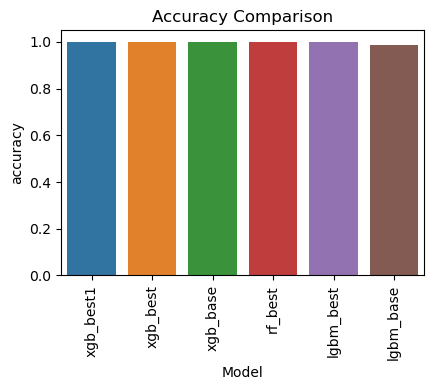

<Figure size 640x480 with 0 Axes>

In [51]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 4))

image_path = 'visuals\Accuracy_comparison__PostHyperparameterTuning.png'

# Accuracy
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='accuracy', data=metrics_df_acc_final)
plt.title('Accuracy Comparison')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
plt.savefig(image_path)

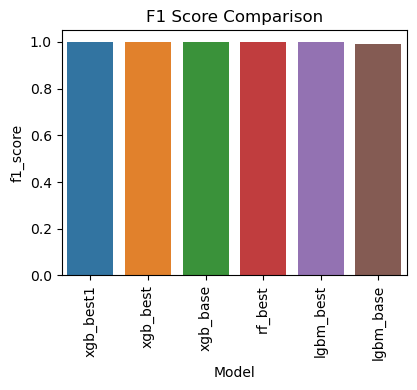

<Figure size 640x480 with 0 Axes>

In [52]:
# F1 Score

# Plotting
plt.figure(figsize=(12, 4))

image_path = 'visuals\F1Score_comparison__PostHyperparameterTuning.png'

plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='f1_score', data=metrics_df_f1_final)
plt.title('F1 Score Comparison')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
plt.savefig(image_path)

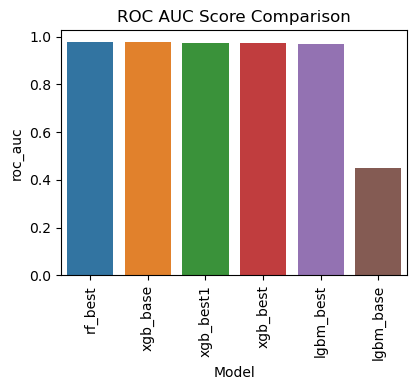

<Figure size 640x480 with 0 Axes>

In [53]:
# ROC AUC Score

# Plotting
plt.figure(figsize=(12, 4))

image_path = 'visuals\Roc_AucScore_comparison_PostHyperparameterTuning.png'

plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='roc_auc', data=metrics_df_roc_final)
plt.title('ROC AUC Score Comparison')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
plt.savefig(image_path)

In [54]:
metrics_df_selected.sort_values(by='roc_auc',ascending=False)

,Model,accuracy,f1_score,roc_auc
5,rf_best,0.999579,0.999561,0.977542
1,xgb_base,0.999579,0.999561,0.977255
3,xgb_best1,0.999649,0.999636,0.974623
2,xgb_best,0.999596,0.999585,0.973098
4,lgbm_best,0.999421,0.999369,0.970017
0,lgbm_base,0.988413,0.992673,0.449614


# FINAL Evaluation of BEST MODEL

Based on the above summary of metrics of the top model. We can clearly see that XGB Algorithm model Xgb_best1 has overperformed all the other modeles in terms of all metrics.We can clearly say that this model is the optimal choice for deployment. This model is expected to effectively detect fraudulent transactions and minimize both false positives and false negatives.

# Feature Importance - XGB

In [55]:
# Extract feature importance for XGBoost

importances = xgb_best1.feature_importances_
importances

array([0.01756514, 0.01341832, 0.01759838, 0.03545066, 0.01622575,
       0.01869487, 0.03757793, 0.01904187, 0.01182982, 0.14560264,
       0.01414336, 0.05204653, 0.01253501, 0.32865548, 0.01224247,
       0.028843  , 0.0237795 , 0.01607542, 0.01561943, 0.01600089,
       0.01428584, 0.01124056, 0.01022254, 0.0104986 , 0.01167876,
       0.02140411, 0.01671082, 0.01664155, 0.01894395, 0.01542684],
      dtype=float32)

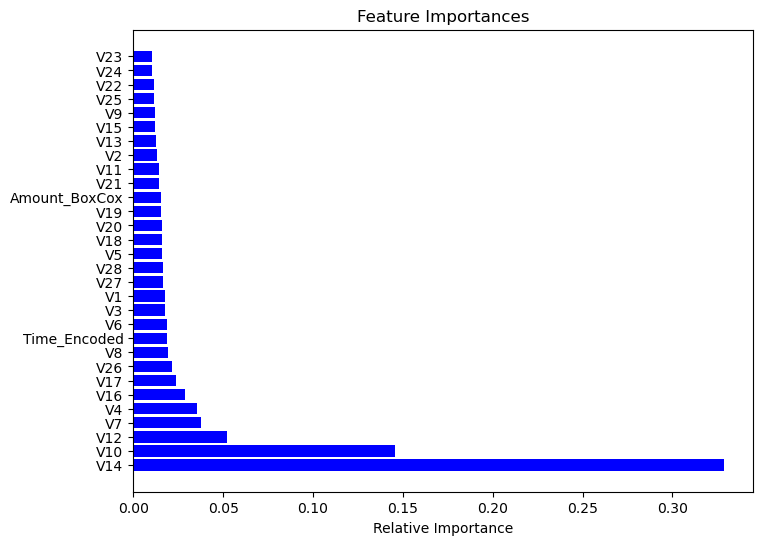

<Figure size 640x480 with 0 Axes>

In [58]:
# plot feature important for XGBoost

import matplotlib.pyplot as plt
import numpy as np

image_path = "visuals\Feature_Importance_xgb_best1.png"

indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
plt.savefig(image_path)